# Test


----------------------------------------------------------------------
TEST SYSTEM CONFIGURATION
CIL version:  23.1.0
{'has_astra': True,
 'has_ccpi_regularisation': True,
 'has_cvxpy': True,
 'has_ipp': True,
 'has_numba': True,
 'has_nvidia': True,
 'has_tigre': True,
 'has_tomophantom': True}
----------------------------------------------------------------------



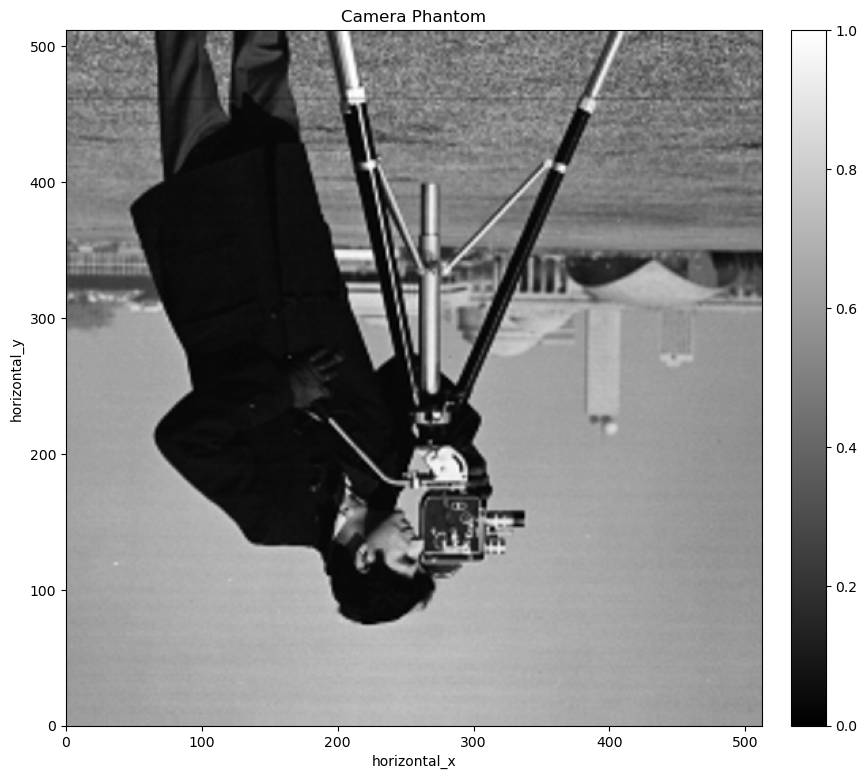

In [1]:
import cil

import os
import subprocess
import sys
import importlib

import logging
import cil.version
import pprint
import unittest

# initialise_tests should be imported and called in each test file to change default behaviour
# it must be in each file as each may get run as an independent processes

def startTestRun(self):
    """Called once before any tests are executed.
    """
    #set logging
    logging.basicConfig(level=logging.WARNING) 

    print("\n----------------------------------------------------------------------")
    print("TEST SYSTEM CONFIGURATION")
    print("CIL version: ", cil.version.version)
    pprint.pprint(system_state)
    print("----------------------------------------------------------------------\n")
    sys.stdout.flush()

def initialise_tests():
    """
    Updates the unittests.TestResults.StartTestRun method with our version.
    """
    setattr(unittest.TestResult, 'startTestRun', startTestRun)


# system state dictionary to be populated
system_state = {}

#nvidia
try:
    subprocess.check_output('nvidia-smi')
    has_nvidia = True
except:
    has_nvidia = False
system_state['has_nvidia']=has_nvidia

#astra
module_info = importlib.util.find_spec("astra")
if module_info is None:
    has_astra = False
else:
    has_astra = True
system_state['has_astra']=has_astra

#tigre
module_info = importlib.util.find_spec("tigre")
if module_info is None:
    has_tigre = False
else:
    has_tigre = True
system_state['has_tigre']=has_tigre

#cvxpy
module_info = importlib.util.find_spec("cvxpy")
if module_info is None:
    has_cvxpy = False
else:
    has_cvxpy = True
system_state['has_cvxpy']=has_cvxpy


#ipp
from cil.framework import cilacc
has_ipp = hasattr(cilacc, 'filter_projections_avh')
system_state['has_ipp']=has_ipp


#ccpi-regularisation toolkit
module_info = importlib.util.find_spec("ccpi")
if module_info != None:
    module_info = importlib.util.find_spec("ccpi.filters.cpu_regularisers")

if module_info is None:
    has_ccpi_regularisation = False
else:
    has_ccpi_regularisation = True
system_state['has_ccpi_regularisation']= has_ccpi_regularisation


#tomophantom
module_info = importlib.util.find_spec("tomophantom")
if module_info is None:
    has_tomophantom = False
else:
    has_tomophantom = True
system_state['has_tomophantom']= has_tomophantom


#has_numba
module_info = importlib.util.find_spec("numba")
if module_info is None:
    has_numba = False
else:
    has_numba = True
system_state['has_numba']= has_numba

startTestRun(None)

from cil.utilities.display import show2D
from cil.utilities import dataexample

camera = dataexample.CAMERA.get()

show2D(camera, title="Camera Phantom", origin="top-left")
